In [1]:
from langgraph.graph import StateGraph
from typing import Dict,Any,TypedDict
from IPython.display import Image,display

In [2]:
def get_coffee_decoction(state: Dict[str,Any])-> Dict[str,Any]:
    state['coffee_decoction']=f"Get me coffee power from user: {state.get('Coffee_powder',0)}-->"
    return state

def add_only_milk(state: Dict[str,Any])-> Dict[str,Any]:
    get_milk=state.get('Milk',0)
    state['Mix_milk_or_hotwater']=f' Get Coffee_powder: {state.get("coffee_decoction",0)} and Added Milk: {get_milk}-->'
    return state

def add_only_hotwater(state: Dict[str,Any])-> Dict[str,Any]:
    get_hotwater=state.get('HotWater',0)
    state['Mix_milk_or_hotwater']=f' Get Coffee_powder: {state.get("coffee_decoction",0)} and Added HotWater {get_hotwater}'
    return state

def check_milk_or_hotwater(state: Dict[str,Any])-> Dict[str,Any]:
    return 'add_only_milk' if state.get('Milk',0) is False else 'add_only_milk'

def add_whiteSugar_stir_Serve(state: Dict[str,Any])->Dict[str,Any]:
    get_whiteSugar=state.get('Sugar',0)
    state['Final']= f" {state['Mix_milk_or_hotwater']} + White sugar added: {get_whiteSugar}"
    return state

def add_jira_stir_Serve(state: Dict[str,Any])->Dict[str,Any]:
    get_jira=state.get('jira',0)
    state['Final']=f" {state['Mix_milk_or_hotwater']} + JIRA is added: {get_jira}"
    return state

def check_whiteSugar_Jira(state: Dict[str,Any])->Dict[str,Any]:
    return 'add_whiteSugar_stir_Serve' if state.get('jira',0) is False else 'add_jira_stir_Serve'

def router_1(state:Dict[str,Any])->Dict[str,Any]:
    return state

def router_2(state:Dict[str,Any])->Dict[str,Any]:
    return state


In [3]:
class CoffeMachine(TypedDict):
    Coffee_powder: str #'1 spoon'
    coffee_decoction : str
    Milk:bool # True or False
    HotWater:bool # True or False
    Mix_milk_or_hotwater: str
    Sugar: bool # True or False
    jira: bool #true or false
    Final: str

In [4]:
builder=StateGraph(CoffeMachine)
builder.add_node('get_coffee_decoction',get_coffee_decoction)
builder.add_node('router_1',router_1)
builder.add_node('add_only_milk',add_only_milk)
builder.add_node('add_only_hotwater',add_only_hotwater)
builder.add_node('router_2',router_2)
builder.add_node('add_whiteSugar_stir_Serve',add_whiteSugar_stir_Serve)
builder.add_node('add_jira_stir_Serve',add_jira_stir_Serve)



In [5]:
builder.set_entry_point('get_coffee_decoction')
builder.add_edge('get_coffee_decoction','router_1')
builder.add_conditional_edges("router_1", check_milk_or_hotwater, 
                            {'add_only_hotwater':'add_only_hotwater',
                             'add_only_milk':'add_only_milk'})
builder.add_edge('add_only_hotwater','router_2')
builder.add_edge('add_only_milk','router_2')
builder.add_conditional_edges("router_2", check_whiteSugar_Jira, 
                            {'add_whiteSugar_stir_Serve':'add_whiteSugar_stir_Serve',
                             'add_jira_stir_Serve':'add_jira_stir_Serve'})
builder.set_finish_point('add_whiteSugar_stir_Serve')
builder.set_finish_point('add_jira_stir_Serve')


In [6]:
graph = builder.compile()

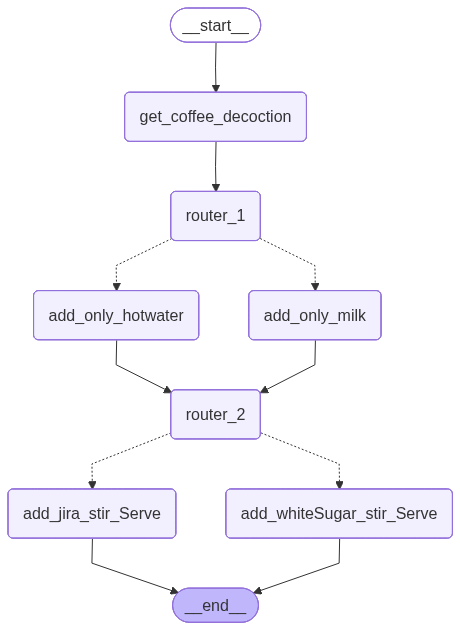

In [7]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
initial_state: CoffeMachine = {
    'Coffee_powder': '2 Spoon Coffee Powder',
    'coffee_decoction':'',
    'Milk':True, # True or False
    'Mix_milk_or_hotwater':'',
    'HotWater':False, # True or False
    'Sugar': True, # True or False
    'jira': False, #true or false
    'Final':''
}

# Run the LangGraph
result = graph.invoke(initial_state)

# Print final result
print("🧃 Final Output:", result["Final"])

🧃 Final Output:   Get Coffee_powder: Get me coffee power from user: 2 Spoon Coffee Powder--> and Added Milk: True--> + White sugar added: True


In [9]:

initial_state: CoffeMachine = {
    'Coffee_powder': '2 Spoon Coffee Powder',
    'coffee_decoction':'',
    'Milk':False, # True or False
    'Mix_milk_or_hotwater':'',
    'HotWater':True, # True or False
    'Sugar': True, # True or False
    'jira': False, #true or false
    'Final':''
}

# Run the LangGraph
result = graph.invoke(initial_state)

# Print final result
print("🧃 Final Output:", result["Final"])

🧃 Final Output:   Get Coffee_powder: Get me coffee power from user: 2 Spoon Coffee Powder--> and Added Milk: False--> + White sugar added: True


In [10]:

initial_state: CoffeMachine = {
    'Coffee_powder': '2 Spoon Coffee Powder',
    'coffee_decoction':'',
    'Milk':False, # True or False
    'Mix_milk_or_hotwater':'',
    'HotWater':True, # True or False
    'Sugar': False, # True or False
    'jira': True, #true or false
    'Final':''
}

# Run the LangGraph
result = graph.invoke(initial_state)

# Print final result
print("🧃 Final Output:", result["Final"])

🧃 Final Output:   Get Coffee_powder: Get me coffee power from user: 2 Spoon Coffee Powder--> and Added Milk: False--> + JIRA is added: True


In [11]:

initial_state: CoffeMachine = {
    'Coffee_powder': '2 Spoon Coffee Powder',
    'coffee_decoction':'',
    'Milk':False, # True or False
    'Mix_milk_or_hotwater':'',
    'HotWater':True, # True or False
    'Sugar': True, # True or False
    'jira': False, #true or false
    'Final':''
}

# Run the LangGraph
result = graph.invoke(initial_state)

# Print final result
print("🧃 Final Output:", result["Final"])

🧃 Final Output:   Get Coffee_powder: Get me coffee power from user: 2 Spoon Coffee Powder--> and Added Milk: False--> + White sugar added: True
